# Importing Libraries

In [2]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re

# Loading data

In [3]:
data = pd.read_csv("spamSMS.csv")
data.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data visualization

In [4]:
data.shape

(5574, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       5574 non-null   object
 1   input Text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.describe()

,Class,input Text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


Text(0, 0.5, 'Count')

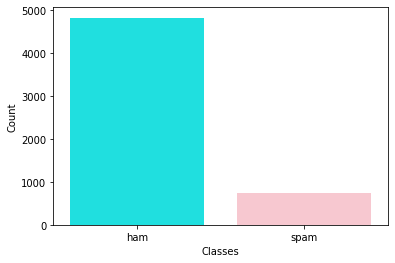

In [7]:
#Checking if the data is imbalanced or not
cols= ["#00FFFF", "#FFC0CB"] #colour palette
bar = sns.countplot(x= data["Class"], palette= cols)
bar.set_xlabel("Classes")
bar.set_ylabel("Count")

Hence, The data imbalance is quite evident here.

**FEATURE ENGINEERING**

**To explore and get to know data better I am creating more features(columns)**
- No_of_Char = Number of characters in the input text
- No_of_Word = Number of words in the input text
- No_of_sen  = Number of sentences in the input text

In [8]:
import nltk

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [11]:
data["No_of_Char"] = data["input Text"].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row["input Text"]), axis=1).apply(len)
data["No_of_sen"]=data.apply(lambda row: nltk.sent_tokenize(row["input Text"]), axis=1).apply(len)

In [12]:
data.head()

,Class,input Text,No_of_Char,No_of_Words,No_of_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,23,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


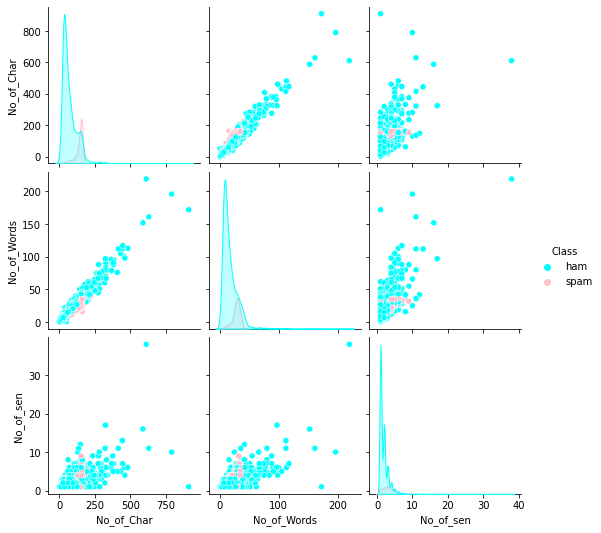

In [13]:
sns.pairplot(data=data, hue="Class",palette=cols)

Here, we can observe few outliners in the class 'Ham'. Hence, we can drop the outliners as they the same thing i.e length of the input text.

# Data Preprocessing

In [14]:
data = data[(data["No_of_Char"]<350)]
data.shape

(5550, 5)

In [15]:
#function to clean input text
def clean_data(inputText):
    text = re.sub('[^a-zA-Z]', ' ', inputText) #Replacing all non-alphabetic characters with a space
    text = text.lower() #converting input to lowercase
    text = text.split()
    text = ' '.join(text)
    return text

In [16]:
#cleaning input text
data["cleaned_text"] = data["input Text"].apply(clean_data)
data["cleaned_text"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: cleaned_text, dtype: object

**Here, I replaced all non-alphabetic characters with a space and converted the text to lower case**

In [17]:
#Tokenization
data["Tokenized_Text"]=data.apply(lambda row: nltk.word_tokenize(row["cleaned_text"]), axis=1)
data["Tokenized_Text"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: Tokenized_Text, dtype: object

**Here, I split the sentence into words(tokens) to remove stopwords in the next step.**

In [18]:
# function to Remove stopwords
def removing_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
data["No_stopword_Text"] = data["Tokenized_Text"].apply(removing_stopwords)
data["No_stopword_Text"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4       [nah, think, goes, usf, lives, around, though]
Name: No_stopword_Text, dtype: object

**Stopwords give meaning to the sentence structure but do not contribute in NLP. so, I removed stopwords from the input text.**

In [21]:
lemmatizer = WordNetLemmatizer()

def lemmatization(text):
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in text]
    return lemmas

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
data["Lemmatized_Text"] = data["No_stopword_Text"].apply(lemmatization)
data["Lemmatized_Text"].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0    [go, jurong, point, crazy, available, bugis, n...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, go, usf, live, around, though]
Name: Lemmatized_Text, dtype: object

In [24]:
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

In [25]:
corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though']

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [27]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [28]:
label_encoder = LabelEncoder()
data["Class"] = label_encoder.fit_transform(data["Class"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Data Visualization After Preprocessing

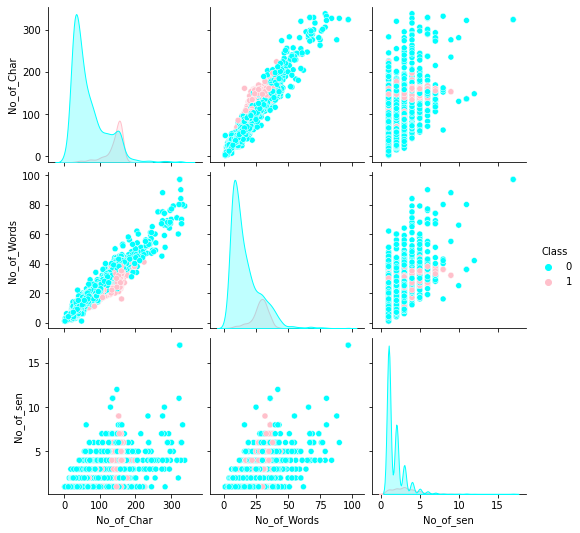

In [29]:
sns.pairplot(data=data, hue="Class",palette=cols)

# Model Building

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

In [31]:
# Splitting the testing and training datasets
y = data["Class"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

**Multinomial Naive Bayes**

In [33]:
Multinomia = MultinomialNB()
Multinomia.fit(X_train, y_train)
Multinomia_score = cross_val_score(Multinomia, X_train,y_train,scoring="accuracy", cv=10)
Multinomia_score

array([0.96915167, 0.96143959, 0.96401028, 0.96915167, 0.9562982 ,
       0.97680412, 0.95876289, 0.93814433, 0.96391753, 0.95876289])

In [34]:
Multinomia_score.mean()

0.9616443166459068

In [35]:
Multinomia_pred_train = Multinomia.predict(X_train)
Multinomia_pred_test = Multinomia.predict(X_test)
Multinomia_pred = metrics.precision_score(y_test, Multinomia_pred_test)
Multinomia_pred

1.0

In [36]:
Multinomia_recal = metrics.recall_score(y_test, Multinomia_pred_test)
Multinomia_recal

0.7296137339055794

In [37]:
Multinomia_f1_s = metrics.f1_score(y_test, Multinomia_pred_test)
Multinomia_f1_s

0.8436724565756824

In [38]:
Multinomia_train_accuracy = Multinomia.score(X_train,y_train)
Multinomia_train_accuracy

0.9745173745173745

In [39]:
Multinomia_test_accuracy = Multinomia.score(X_test,y_test)
Multinomia_test_accuracy

0.9621621621621622

In [40]:
precision.append(Multinomia_pred)
recall.append(Multinomia_recal)
f1_score.append(Multinomia_f1_s)
trainset_accuracy.append(Multinomia_train_accuracy)
testset_accuracy.append(Multinomia_test_accuracy)

**KNN**

In [41]:
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
KNC_score = cross_val_score(KNC, X_train,y_train,scoring="accuracy", cv=10)
KNC_score

array([0.89974293, 0.90488432, 0.91002571, 0.9125964 , 0.89974293,
       0.90979381, 0.90463918, 0.89690722, 0.92010309, 0.92525773])

In [42]:
KNC_score.mean()

0.9083693318845573

In [43]:
KNC_pred_train = KNC.predict(X_train)
KNC_pred_test = KNC.predict(X_test)
KNC_pred = metrics.precision_score(y_test, KNC_pred_test)
KNC_pred

1.0

In [44]:
KNC_recal = metrics.recall_score(y_test, KNC_pred_test)
KNC_recal

0.3218884120171674

In [45]:
KNC_f1_s = metrics.f1_score(y_test, KNC_pred_test)
KNC_f1_s

0.487012987012987

In [46]:
KNC_train_accuracy = KNC.score(X_train,y_train)
KNC_train_accuracy

0.923037323037323

In [47]:
KNC_test_accuracy = KNC.score(X_test,y_test)
KNC_test_accuracy

0.9051051051051051

In [48]:
precision.append(KNC_pred)
recall.append(KNC_recal)
f1_score.append(KNC_f1_s)
trainset_accuracy.append(KNC_train_accuracy)
testset_accuracy.append(KNC_test_accuracy)

**SVM**

In [75]:
SVM = SVC(probability=True)
SVM.fit(X_train, y_train)

SVC(probability=True)

In [50]:
SVM_score = cross_val_score(SVM, X_train,y_train,scoring="accuracy", cv=5)
SVM_score

array([0.96911197, 0.97039897, 0.97297297, 0.95624196, 0.97554698])

In [51]:
SVM_score.mean()

0.9688545688545688

In [52]:
SVM_pred_train = SVM.predict(X_train)
SVM_pred_test = SVM.predict(X_test)
SVM_pred = metrics.precision_score(y_test, SVM_pred_test)
SVM_pred

0.9947643979057592

In [53]:
SVM_recal = metrics.recall_score(y_test, SVM_pred_test)
SVM_recal

0.8154506437768241

In [54]:
SVM_f1_s = metrics.f1_score(y_test, SVM_pred_test)
SVM_f1_s

0.8962264150943396

In [55]:
SVM_train_accuracy = SVM.score(X_train,y_train)
SVM_train_accuracy

0.9979407979407979

In [56]:
SVM_test_accuracy = SVM.score(X_test,y_test)
SVM_test_accuracy

0.9735735735735735

In [57]:
precision.append(SVM_pred)
recall.append(SVM_recal)
f1_score.append(SVM_f1_s)
trainset_accuracy.append(SVM_train_accuracy)
testset_accuracy.append(SVM_test_accuracy)

**Random Forest**

In [58]:
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC_score = cross_val_score(RFC, X_train,y_train,scoring="accuracy", cv=5)
RFC_score

array([0.96653797, 0.97683398, 0.97683398, 0.96782497, 0.97554698])

In [59]:
RFC_score.mean()

0.9727155727155727

In [60]:
RFC_pred_train = RFC.predict(X_train)
RFC_pred_test = RFC.predict(X_test)
RFC_pred = metrics.precision_score(y_test, RFC_pred_test)
RFC_pred

1.0

In [61]:
RFC_recal = metrics.recall_score(y_test, RFC_pred_test)
RFC_recal

0.8540772532188842

In [62]:
RFC_f1_s = metrics.f1_score(y_test, RFC_pred_test)
RFC_f1_s

0.9212962962962963

In [63]:
RFC_train_accuracy = RFC.score(X_train,y_train)
RFC_train_accuracy

1.0

In [64]:
RFC_test_accuracy = RFC.score(X_test,y_test)
RFC_test_accuracy

0.9795795795795795

In [65]:
precision.append(RFC_pred)
recall.append(RFC_recal)
f1_score.append(RFC_f1_s)
trainset_accuracy.append(RFC_train_accuracy)
testset_accuracy.append(RFC_test_accuracy)

# Confusion Matrix

In [66]:
from matplotlib.colors import ListedColormap
cmap2 = ListedColormap(["#00FFFF","#FFC0CB"])

**Confusion Matrix of Multinomial Naive Bayes Model**

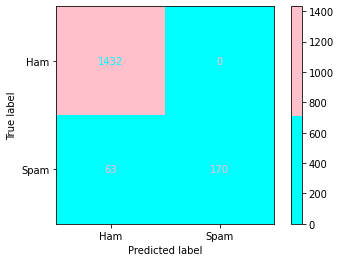

In [67]:
Multinomia_confusion_matrix = metrics.confusion_matrix(y_test, Multinomia_pred_test)
Multinomia_display = ConfusionMatrixDisplay(Multinomia_confusion_matrix,display_labels=["Ham","Spam"])
Multinomia_display.plot(cmap=cmap2)
plt.show()

**Confusion Matrix of KNN Model**

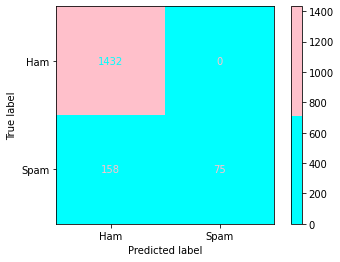

In [68]:
KNC_confusion_matrix = metrics.confusion_matrix(y_test, KNC_pred_test)
KNC_display = ConfusionMatrixDisplay(KNC_confusion_matrix,display_labels=["Ham","Spam"])
KNC_display.plot(cmap=cmap2)
plt.show()

**Confusion Matrix of SVM Model**

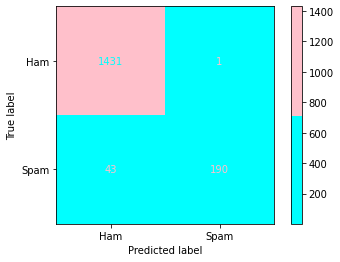

In [69]:
SVM_confusion_matrix = metrics.confusion_matrix(y_test, SVM_pred_test)
SVM_display = ConfusionMatrixDisplay(SVM_confusion_matrix,display_labels=["Ham","Spam"])
SVM_display.plot(cmap=cmap2)
plt.show()

**Confusion Matrix of Random Forest Model**

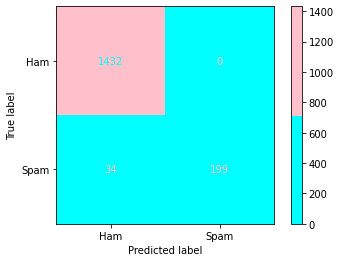

In [70]:
RFC_confusion_matrix = metrics.confusion_matrix(y_test, RFC_pred_test)
RFC_display = ConfusionMatrixDisplay(RFC_confusion_matrix,display_labels=["Ham","Spam"])
RFC_display.plot(cmap=cmap2)
plt.show()

# EVALUATING MODELS

In [71]:
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
Results = pd.DataFrame(data, index =["NaiveBayes", "KNeighbours","SVC","RFC"])

In [72]:
Results.style.background_gradient(cmap=cmap2)

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,1.000000,0.729614,0.843672,0.962162,0.974517
KNeighbours,1.000000,0.321888,0.487013,0.905105,0.923037
SVC,0.994764,0.815451,0.896226,0.973574,0.997941
RFC,1.000000,0.854077,0.921296,0.979580,1.000000


# ROC Curves

ROC Curve for Naive Bayes:


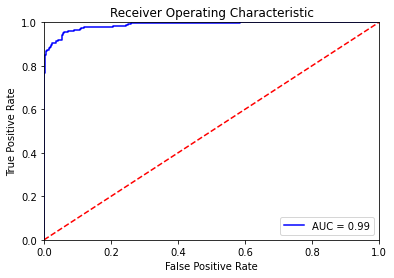

In [73]:
Multinomia_pred = Multinomia.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, Multinomia_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for Naive Bayes:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for KNeibhours Classifier:


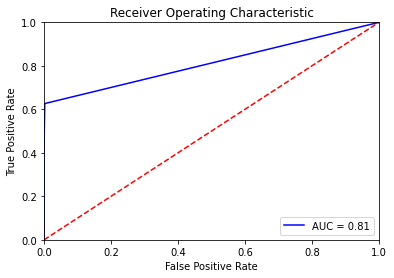

In [74]:
KNC_pred = KNC.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, KNC_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for KNeibhours Classifier:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for SVM Classifier:


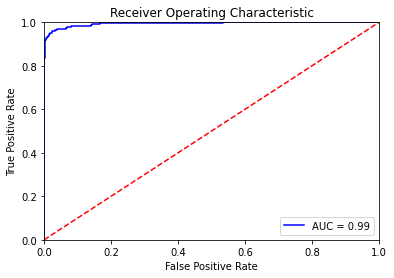

In [76]:
SVM_pred = SVM.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, SVM_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for SVM Classifier:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for SVM Classifier:


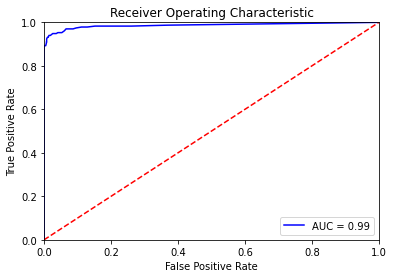

In [77]:
RFC_pred = RFC.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, RFC_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for SVM Classifier:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()